#### Instructions:  
1. Libraries allowed: **Python basic libraries, numpy.** except the functions explicitly mentioned.
2. Show all outputs.
3. Submit jupyter notebook and a pdf export of the notebook.


## Task
This assignment will prepare you for the image stitching task, which you will be doing in the next assignment. This task involves building a pipeline for finding correspondences between two images that includes feature detection, description, and matching.

## Keypoint detection

Q1. In this part, you will implement a harris corner detector from scratch. Use opencv functions, `cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]	) ->	dst` for linear filtering and `cv2.copyMakeBorder()` for padding. `ddepth` argument in the `filter2D` function to 64-bit data type `cv.CV_64F`, which is default for numpy. Use "reflection" for padding. All other codes need to be implemented from scratch using basic python and numbpy libraries. Use matplotlib for visualization.

a) Take an image of a scene that contains corner like features, e.g., buildings, furnitures. Load the image using PIL and convert it to grayscale. Normalize the image between 0 and 1.

In [44]:
from PIL import Image,ImageOps
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

(1080, 1619)


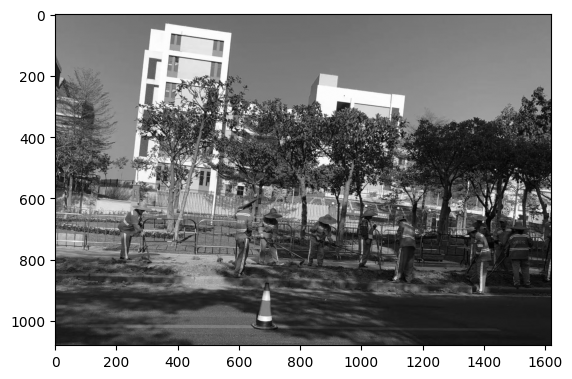

In [45]:
# import image using PIL
im=Image.open("image2.jpg")
# convert to grayscale
im_gray=ImageOps.grayscale(im)
#normalize the image between 0 and 1
img=np.array(im_gray)/255
# show output
plt.imshow(img,cmap='gray')
print(img.shape)

b) Write the horizontal and vertical sobel filter.

In [46]:
# horizontal sobel filter
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
# vertical sobel filter
sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# show output
print(sobel_x)
print(sobel_y)

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


c) use the sobel filters to calculate $I_x$ and $I_y$ using  `cv2.filter2d`. Apply padding to keep the output size unchanged.

In [47]:
# Apply reflection padding to keep the output size unchanged, use cv2.copyMakeBorder()
img_padded = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_REFLECT)
# use the sobel filters to calculate  Ix  and  Iy  using cv2.filter2d
Ix = cv.filter2D(img_padded, cv.CV_64F, sobel_x)
Iy = cv.filter2D(img_padded, cv.CV_64F, sobel_y)
# cv2.filter2d returns same size img, so I have to slice it...
Ix = Ix[1:-1, 1:-1]
Iy = Iy[1:-1, 1:-1]
# show output
print(Ix)
print(Iy)
# show size of Ix,Iy
print(Ix.shape)
print(Iy.shape)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.00392157  0.00392157 -0.00392157 ... -0.01176471  0.
   0.        ]
 [-0.00784314 -0.01960784 -0.03921569 ... -0.01568627  0.
   0.        ]
 [-0.02352941 -0.03921569 -0.05882353 ... -0.01568627  0.
   0.        ]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.62745098e-01  2.47058824e-01  2.15686275e-01 ... -1.17647059e-02
  -1.56862745e-02 -1.56862745e-02]
 [ 2.11764706e-01  1.92156863e-01  1.64705882e-01 ...  2.77555756e-17
   2.77555756e-17  2.77555756e-17]
 [ 8.62745098e-02  7.05882

d) Calculate $\sum w(x,y) I_x^2$,  $\sum w(x,y) I_y^2$, and  $\sum w(x,y) I_x I_y$. Use a gaussian filter of size $5\times5$ with $\sigma=0.5$. Apply padding to keep the output size unchanged.

In [48]:
# Apply reflection padding to keep the output size unchanged, use cv2.copyMakeBorder()
Ix = cv.copyMakeBorder(Ix, 2, 2, 2, 2, cv.BORDER_REFLECT)
Iy = cv.copyMakeBorder(Iy, 2, 2, 2, 2, cv.BORDER_REFLECT)
# Use a gaussian filter of size  5×5  with  σ=0.5
def gaussian_kernel(size=5, sigma=0.5):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

gaussian_5x5 = gaussian_kernel(5, 0.5)
# Calculate Ix^2,Iy^2,IxIy
Ix2 = Ix**2
Iy2 = Iy**2
IxIy = Ix*Iy
# Calculate convolution
Ix2_conv = cv.filter2D(Ix2, cv.CV_64F, gaussian_5x5)
Iy2_conv = cv.filter2D(Iy2, cv.CV_64F, gaussian_5x5)
IxIy_conv = cv.filter2D(IxIy, cv.CV_64F, gaussian_5x5)
# cv2.filter2d returns same size img, so I have to slice it...
Ix2_conv = Ix2_conv[2:-2, 2:-2]
Iy2_conv = Iy2_conv[2:-2, 2:-2]
IxIy_conv = IxIy_conv[2:-2, 2:-2]
# show output
print(Ix2_conv)
print(Iy2_conv)
print(IxIy_conv)
# show size of Ix2_conv,Iy2_conv,IxIx_conv
print(Ix2_conv.shape)
print(Iy2_conv.shape)
print(IxIy_conv.shape)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.20825467e-05 1.19670840e-04 2.57294203e-04 ... 1.22136025e-04
  1.45950591e-05 3.60880812e-08]
 [1.47856804e-04 5.48924738e-04 1.55627740e-03 ... 2.09448206e-04
  2.50287248e-05 6.18866045e-08]
 [5.99175471e-04 1.51404191e-03 3.38141913e-03 ... 2.19710796e-04
  2.62550878e-05 6.49189381e-08]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.47506447e-02 5.72352985e-02 4.42083722e-02 ... 1.22168488e-04
  2.09510093e-04 2.19775715e-04]

e) For each pixel, calculate the structure tensor, $M(x,y)$, as described in the lecture slides and $R(x,y)$ as $R = det(M) - 0.06 (trace(M))^2$. Put $R$ in a matrix.

(1080, 1619)


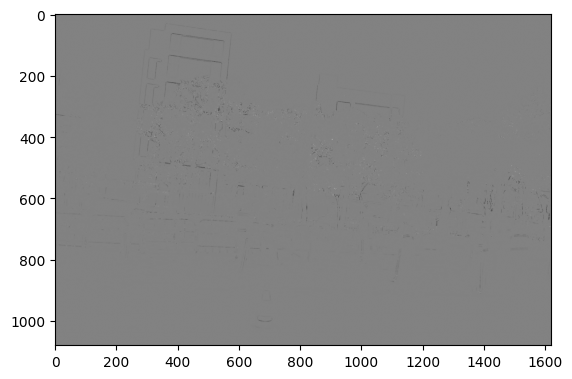

In [49]:
# Calculate det(M), trace(M)
detM = Ix2_conv * Iy2_conv - IxIy_conv ** 2
traceM = Ix2_conv + Iy2_conv

# Calculate R
R = detM - 0.06 * (traceM ** 2)

# show output
print(R.shape)

# show img
plt.imshow(R,cmap='gray')

f) Apply thresholding to find the high responses by setting the values above the threshold to 1 and below to 0.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


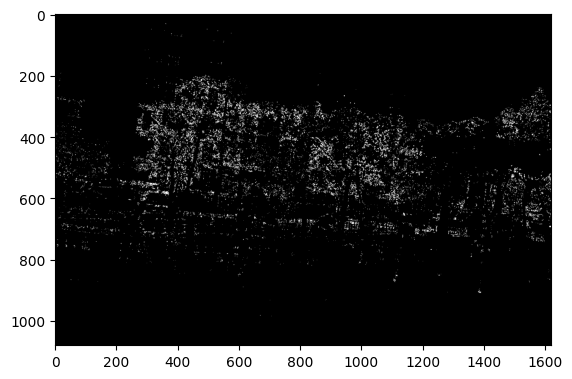

In [50]:
# Apply thresholding to find the high responses by setting the values above the threshold to 1 and below to 0.
max_response = R.max()
fraction = 0.01
threshold= fraction * max_response
R[R > threshold] = 1
R[R <= threshold] = 0
# show output
print(R)
# show img
plt.imshow(R,cmap='gray')

g) Do non-maximum suppression. Use a $7\times 7$ window to suppress non-maximum keypoints. Put the keypoints in a list of tuples as $keypoints = [(x1, y1), ..., (xn,yn)]$

In [51]:
def non_maximum_suppression(R, window_size=7):
    keypoints = []
    height, width = R.shape
    offset = window_size // 2  # Calculate offset for window center

    for i in range(offset, height - offset):
        for j in range(offset, width - offset):
            if R[i, j] == 1:  # Check if current pixel is a potential keypoint
                # Check if current pixel is maximum in the window
                window = R[i - offset:i + offset + 1, j - offset:j + offset + 1]
                if R[i, j] == window.max():
                    keypoints.append((j, i))  # Add keypoint to list (x, y)

    return keypoints

# Call the function to get keypoints
keypoints = non_maximum_suppression(R)

g) Visualize the keypoints Use online resources to convert keypoints. Then use `cv2.drawKeypoints()` to draw the keypoints.

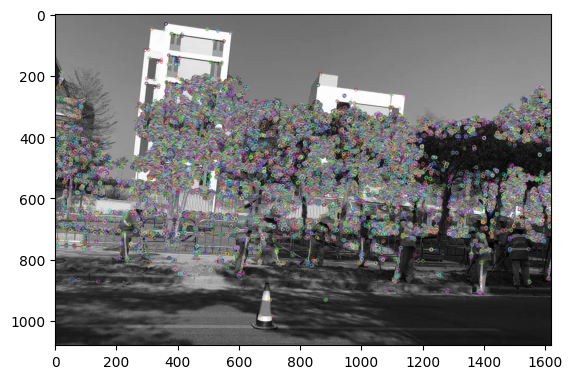

In [52]:
# Convert keypoints to cv2.KeyPoint objects
keypoints_cv = [cv.KeyPoint(x, y, size=10) for x, y in keypoints]

# Convert the image to CV_8U if it's CV_64F
img_8u = cv.convertScaleAbs(img, alpha=(255.0))

# Draw keypoints on the original image
img_with_keypoints = cv.drawKeypoints(img_8u, keypoints_cv, outImage=None,
                                      flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(img_with_keypoints)
plt.show()

h) Combine steps (b) to (g) in a function that takes img and threshold as arguments and return the keypoints.

In [53]:
def harris_corner_detector(image, threshold=0.5): # define threshold as the fraction of the maximum
    # Step b: Calculate image gradients using Sobel filters
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    Ix = cv.filter2D(image, cv.CV_64F, sobel_x)
    Iy = cv.filter2D(image, cv.CV_64F, sobel_y)

    # Step d: Calculate weighted sums of gradient products
    def gaussian_kernel(size=5, sigma=0.5):
        ax = np.linspace(-(size // 2), size // 2, size)
        xx, yy = np.meshgrid(ax, ax)
        kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
        return kernel / np.sum(kernel)

    gaussian_5x5 = gaussian_kernel(5, 0.5)
    Ix2_conv = cv.filter2D(Ix**2, cv.CV_64F, gaussian_5x5)
    Iy2_conv = cv.filter2D(Iy**2, cv.CV_64F, gaussian_5x5)
    IxIy_conv = cv.filter2D(Ix*Iy, cv.CV_64F, gaussian_5x5)

    # Step e: Calculate structure tensor and corner response
    detM = Ix2_conv * Iy2_conv - IxIy_conv**2
    traceM = Ix2_conv + Iy2_conv
    R = detM - 0.06 * (traceM**2)
    # show output
    print(R.shape)
    # show img
    plt.imshow(R,cmap='gray')

    # Step f: Apply thresholding
    max_response = R.max()
    threshold_value = threshold * max_response  # Threshold as fraction of maximum
    R[R > threshold_value] = 1
    R[R <= threshold_value] = 0
    # show output
    print(R)
    # show img
    plt.imshow(R,cmap='gray')

    # Step g: Non-maximum suppression
    def non_maximum_suppression(R, window_size=7):
        keypoints = []
        height, width = R.shape
        offset = window_size // 2

        for i in range(offset, height - offset):
            for j in range(offset, width - offset):
                if R[i, j] == 1:
                    window = R[i - offset:i + offset + 1, j - offset:j + offset + 1]
                    if R[i, j] == window.max():
                        keypoints.append((j, i))
        # Display the image with keypoints
        plt.imshow(img_with_keypoints)
        plt.show()
        # Print the keypoints
        print(keypoints)
        return keypoints

    keypoints = non_maximum_suppression(R)
    return keypoints

## Feature descriptor
Q2. a) Here, you will build a simple feature descritptor, which is the intensities in the $5\times5$ neighboorhood.. For each keypoint, find the feature descriptors.


In [54]:
def get_descriptors(image, keypoints, size=5):
    descriptors = []
    height, width = image.shape

    for x, y in keypoints:
        # Ensure the neighborhood is within the image boundaries
        x_start = max(0, x - size // 2)
        x_end = min(width, x + size // 2 + 1)
        y_start = max(0, y - size // 2)
        y_end = min(height, y + size // 2 + 1)

        # Extract the neighborhood intensities as the descriptor
        descriptor = image[y_start:y_end, x_start:x_end].flatten()
        descriptors.append(descriptor)

    return descriptors

# Get the descriptors for the keypoints detected earlier
descriptors = get_descriptors(img, keypoints)

b) Create a second image by running the following code that will translate the original image.

In [55]:
t_x = 30
t_y = 50
H = np.array([[1.0,0, t_x],
              [0.0,1.0, t_y]])

img2 = cv.warpAffine(img, H, (img.shape[1], img.shape[0]))

c) Detect keypoints and find the feature descriptors for `img2`.

(1080, 1619)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


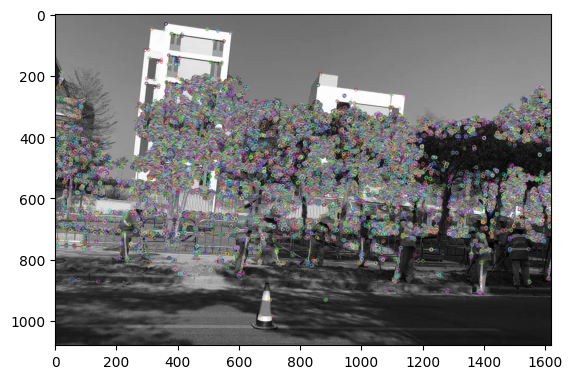

[]


In [56]:
keypoints2=harris_corner_detector(img2, threshold=0.5)
descriptors2 = get_descriptors(img2, keypoints2)